Chargerment du fichier appartements_data_db.csv avec Pandas

In [1]:
import pandas as pd

df = pd.read_csv('appartements_data_db.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1772 non-null   object 
 1   price         1490 non-null   object 
 2   city_name     1772 non-null   object 
 3   salon         1620 non-null   float64
 4   nb_rooms      1490 non-null   float64
 5   nb_baths      1480 non-null   float64
 6   surface_area  1742 non-null   float64
 7   equipment     1402 non-null   object 
 8   link          1773 non-null   object 
dtypes: float64(4), object(5)
memory usage: 124.8+ KB
None


In [2]:
print(df.head())

                                               title         price  \
0       CMN-MA-1752 - Appartement à vendre à Palmier  2 000 000 DH   
1  66370-Vente Appt à Casablanca Hay Hassani de 1...  1 195 000 DH   
2           Appartement à vendre 81 m² à Dar Bouazza  1 350 000 DH   
3  63860-Vente Appt à Casablanca Quartier Bd Med ...    900 000 DH   
4                          Appartement à Rabat Agdal  3 100 000 DH   

     city_name  salon  nb_rooms  nb_baths  surface_area  \
0   Casablanca    NaN       2.0       2.0         168.0   
1   Casablanca    NaN       2.0       2.0          98.0   
2  Dar Bouazza    1.0       2.0       2.0          81.0   
3   Casablanca    NaN       1.0       1.0          56.0   
4        Rabat    2.0       3.0       2.0         200.0   

                                           equipment  \
0                  Ascenseur/Balcon/Parking/Terrasse   
1  Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...   
2  Ascenseur/Balcon/Chauffage/Climatisation/Conci...   


In [3]:
df.describe()

,salon,nb_rooms,nb_baths,surface_area
count,1620.000000,1490.000000,1480.000000,1742.000000
mean,1.267284,2.379195,2.307432,174.933410
std,0.557539,0.667159,7.629128,2969.500693
min,0.000000,1.000000,0.000000,1.000000
25%,1.000000,2.000000,1.000000,71.000000
50%,1.000000,2.000000,2.000000,89.000000
75%,1.000000,3.000000,2.000000,114.750000
max,8.000000,7.000000,134.000000,123456.000000


Identifier les valeurs manquantes et les doublons

In [4]:
df.isnull().sum()

title             1
price           283
city_name         1
salon           153
nb_rooms        283
nb_baths        293
surface_area     31
equipment       371
link              0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(41)

Analyser la distribution des variables numériques

In [6]:
# Version plus détaillée (incluant la médiane)
print(df.describe(include='all'))

                       title       price   city_name        salon  \
count                   1772        1490        1772  1620.000000   
unique                  1471         355          77          NaN   
top     appartement à vendre  850 000 DH  Casablanca          NaN   
freq                      33          34         626          NaN   
mean                     NaN         NaN         NaN     1.267284   
std                      NaN         NaN         NaN     0.557539   
min                      NaN         NaN         NaN     0.000000   
25%                      NaN         NaN         NaN     1.000000   
50%                      NaN         NaN         NaN     1.000000   
75%                      NaN         NaN         NaN     1.000000   
max                      NaN         NaN         NaN     8.000000   

           nb_rooms     nb_baths   surface_area  \
count   1490.000000  1480.000000    1742.000000   
unique          NaN          NaN            NaN   
top             Na

count           1490
unique           355
top       850 000 DH
freq              34
Name: price, dtype: object


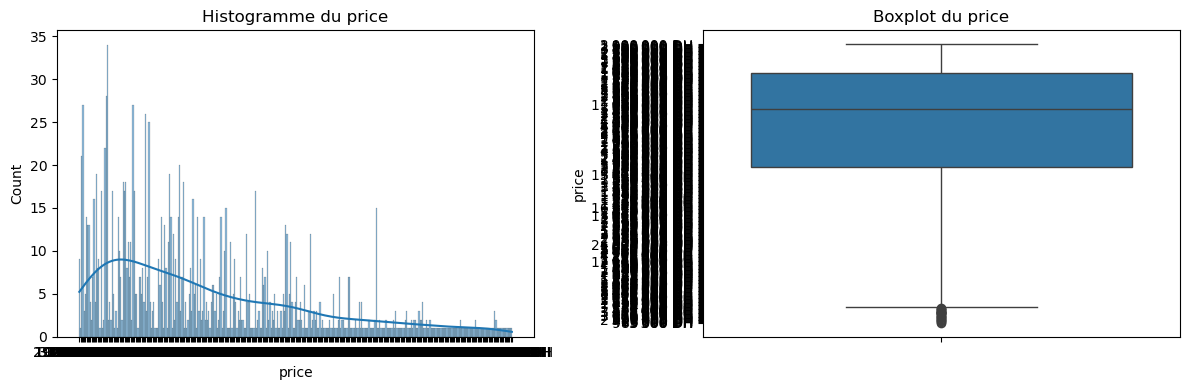

In [7]:
# Statistiques
from matplotlib import pyplot as plt
import seaborn as sns

print(df['price'].describe())

# Visualisation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Histogramme du price')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'])
plt.title('Boxplot du price')

plt.tight_layout()
plt.show()

Prétraitement des données 

--> Nettoyage & Transformation 

1. Extraction des Équipements (equipment) en Colonnes Booléennes

In [8]:
df_equipment = df['equipment'].str.get_dummies(sep='/')
df = pd.concat([df, df_equipment], axis=1)

df.drop('equipment', axis=1, inplace=True)
df.drop('link', axis=1, inplace=True)
df.drop('title', axis=1, inplace=True)

In [9]:
df.columns
df

,price,city_name,salon,nb_rooms,nb_baths,surface_area,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse
0,2 000 000 DH,Casablanca,NaN,2.0,2.0,168.0,1,1,0,0,0,0,0,0,1,0,1
1,1 195 000 DH,Casablanca,NaN,2.0,2.0,98.0,1,1,1,1,0,1,0,0,1,0,0
2,1 350 000 DH,Dar Bouazza,1.0,2.0,2.0,81.0,1,1,1,1,1,1,1,0,1,1,1
3,900 000 DH,Casablanca,NaN,1.0,1.0,56.0,1,0,1,1,0,1,0,1,1,1,1
4,3 100 000 DH,Rabat,2.0,3.0,2.0,200.0,1,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,NaN,Agadir,1.0,NaN,NaN,62.0,1,1,0,0,0,1,0,0,1,1,0
1769,NaN,Agadir,2.0,NaN,NaN,110.0,1,0,0,0,0,0,0,0,1,0,0
1770,NaN,Temara,2.0,NaN,NaN,12000.0,1,1,0,0,0,0,0,0,1,1,0
1771,700 000 DH,Casablanca,1.0,2.0,2.0,84.0,0,0,0,0,0,1,0,0,1,1,0


La colonne 'equipment' a déjà été transformée et supprimée.
Rien à faire ici, le DataFrame df contient déjà les colonnes booléennes des équipements.

2. Conversion de price (type Objet → Float)

In [10]:
df['price'] = df['price'].str.replace(r'[^\d]', '', regex=True)  
df['price'] = df['price'].astype(float)
# Vérification
print(df['price'].dtype)  # Doit afficher "float64"


float64


In [12]:
df.isnull().sum()

price              283
city_name            1
salon              153
nb_rooms           283
nb_baths           293
surface_area        31
Ascenseur            0
Balcon               0
Chauffage            0
Climatisation        0
Concierge            0
Cuisine Équipée      0
Duplex               0
Meublé               0
Parking              0
Sécurité             0
Terrasse             0
dtype: int64

3. Suppression des Colonnes Inutiles (equipment, link)

In [11]:
df.drop(['link'], axis=1, inplace=True, errors='ignore')

equipment déjà supprimé avant

4. Traitement de city_name (Uniformisation des Noms de Villes)

In [12]:
# afficher la liste des noms de ville dans une colonne du DataFrame
df['ville'] = df['city_name'].str.split(',').str[0]

In [13]:
print(df['ville'])

0        Casablanca
1        Casablanca
2       Dar Bouazza
3        Casablanca
4             Rabat
           ...     
1768         Agadir
1769         Agadir
1770         Temara
1771     Casablanca
1772         Temara
Name: ville, Length: 1773, dtype: object


In [14]:
# supprimer les villes en double et ignorer les valeurs nan
ville = [v for v in set(df['ville']) if pd.notnull(v)]
ville.sort()
print(ville)

['Agadir', 'Agadir Melloul', 'Ain Aouda', 'Ain Attig', 'Asilah', 'Benslimane', 'Berkane', 'Berrechid', 'Biougra', 'Bni Ansar', 'Bouskoura', 'Bouznika', 'Béni Mellal', 'Cabo Negro', 'Casablanca', 'Dakhla', 'Dar Bouazza', 'Dcheira', 'Dcheïra El Jihadia', 'Deroua', 'El Hajeb', 'El Jadida', 'El Ksiba', 'El Mansouria', 'El Menzeh', 'Essaouira', 'Fnideq', 'Fès', 'Had Soualem', 'Ifrane', 'Inzegan', 'Khemisset', 'Khouribga', 'Kénitra', 'Marrakech', 'Martil', 'Mdiq', 'Mehdia', 'Meknès', 'Mers El Kheir', 'Merzouga', 'Mohammedia', 'Nador', 'Nouaceur', 'Oued Laou', 'Oued Zem', 'Oujda', 'Rabat', 'Safi', 'Saidia', 'Salé', 'Sefrou', 'Selouane', 'Settat', 'Sidi Allal El Bahraoui', 'Sidi Bennour', 'Sidi Bouknadel', 'Sidi Rahal', 'Skhirat', 'Souk El Arbaa', 'Taghazout', 'Tamaris', 'Tamesna', 'Tanger', 'Taounate', 'Taza', 'Temara', 'Tit Mellil', 'Tiznit', 'Tétouan', 'أكادير', 'الدار البيضاء', 'الرباط', 'القنيطرة', 'المحمدية', 'طنجة', 'مراكش']


Remplacer les noms arabes par leur équivalent français

In [15]:
city_mapping = {
    "أكادير" : "Agadir",
    "الرباط" : "Rabat",
    "القنيطرة" :"kinetra",
    "المحمدية" : "Mouhmadia",
    "الدار البيضاء": "Casablanca",
    "مراكش": "Marrakech",
    "طنجة": "Tanger",
}

df['city_name'] = df['city_name'].replace(city_mapping)

Remplacer les valeurs manquantes par "Unknown"

In [16]:
df['city_name'] = df['city_name'].fillna("Unknown", inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_18264\4139866619.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['city_name'] = df['city_name'].fillna("Unknown", inplace=True)


In [17]:
print(df['city_name'].unique())  # Affiche les villes uniformisées

[None]


Gestion des valeurs manquantes
- Pour les colonnes numériques : imputer les valeurs manquantes par la médiane.
- Pour les colonnes catégorielles (chaînes de caractères) : imputer avec "Unknown".

In [18]:
from sklearn.impute import SimpleImputer

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns # Sélectionner uniquement les colonnes numériques

numeric_cols = numeric_cols[numeric_cols != 'price'] # exclu price
# suprimer les valeur nulle de price
df.dropna(subset=['price'], inplace=True)

imputer_median = SimpleImputer(strategy='median')
df[numeric_cols] = imputer_median.fit_transform(df[numeric_cols])

2. Colonnes Catégorielles (Strings) → Imputation par "Unknown"

In [19]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns # Sélectionner les colonnes catégorielles
df[categorical_cols] = df[categorical_cols].fillna("Unknown") # Remplacer les NaN par "Unknown"

In [23]:
print("Valeurs manquantes après imputation :")
print(df.isnull().sum())

Valeurs manquantes après imputation :
price              0
city_name          0
salon              0
nb_rooms           0
nb_baths           0
surface_area       0
Ascenseur          0
Balcon             0
Chauffage          0
Climatisation      0
Concierge          0
Cuisine Équipée    0
Duplex             0
Meublé             0
Parking            0
Sécurité           0
Terrasse           0
ville              0
dtype: int64


Détection et suppression des valeurs aberrantes:
- Utiliser des méthodes statistiques (boîtes à moustaches, z-score, IQR) pour détecter les outliers.
- Supprimer les lignes contenant des valeurs aberrantes sur des colonnes clés (ex: price, surface_area, etc.).

In [20]:
import pandas as pd

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_clean = df.copy()
for col in ['price', 'surface_area']:  # Colonnes à vérifier
    df_clean = remove_outliers_iqr(df_clean, col)

print(f"Taille avant/après : {len(df)} → {len(df_clean)} lignes")

Taille avant/après : 1490 → 1362 lignes


One-Hot Encoding (Dummy Encoding)
Meilleur pour : Variables nominales sans hiérarchie (ex: couleurs, villes)

In [21]:
# Avec scikit-learn (meilleur pour les pipelines)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[['city_name']])

Encodage des variables catégorielles:
--> Appliquer un Label Encoding selon le modèle utilisé, en particulier sur city_name.

In [141]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder() # Initialisation
# df['city_name_encoded'] = label_encoder.fit_transform(df['city_name']) # Application sur 'city_name'
# print(df[['city_name', 'city_name_encoded']].head()) # Vérification

Mise à l’échelle des variables: --> Appliquer une normalisation (MinMaxScaler) ou une standardisation (StandardScaler) sur les variables numériques pour harmoniser les échelles.

In [22]:
from sklearn.preprocessing import StandardScaler

# Sélectionner uniquement les colonnes numériques
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Colonnes numériques :", list(numeric_cols))

# Initialisation + application
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Vérification (moyenne ~0, écart-type ~1)
print(df[numeric_cols].describe())

Colonnes numériques : ['price', 'salon', 'nb_rooms', 'nb_baths', 'surface_area', 'Ascenseur', 'Balcon', 'Chauffage', 'Climatisation', 'Concierge', 'Cuisine Équipée', 'Duplex', 'Meublé', 'Parking', 'Sécurité', 'Terrasse']
              price         salon      nb_rooms      nb_baths  surface_area  \
count  1.490000e+03  1.490000e+03  1.490000e+03  1.490000e+03  1.490000e+03   
mean   7.629989e-17 -1.812122e-16  1.096811e-16 -4.053432e-17 -1.239873e-16   
std    1.000336e+00  1.000336e+00  1.000336e+00  1.000336e+00  1.000336e+00   
min   -9.271102e-01 -2.439874e+00 -2.067960e+00 -3.032999e-01 -2.125640e+00   
25%   -4.616742e-01 -4.842999e-01 -5.685633e-01 -1.717375e-01 -5.759140e-01   
50%   -2.328871e-01 -4.842999e-01 -5.685633e-01 -4.017509e-02 -2.048527e-01   
75%    1.773520e-01 -4.842999e-01  9.308337e-01 -4.017509e-02  3.626526e-01   
max    1.800697e+01  7.337997e+00  6.928421e+00  1.732606e+01  1.225844e+01   

          Ascenseur        Balcon     Chauffage  Climatisation     

In [83]:
from sklearn.preprocessing import MinMaxScaler

# Colonnes à normaliser (ex: [0, 1])
scaler = MinMaxScaler(feature_range=(0, 1)) 
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Vérification (valeurs entre 0 et 1)
print(df[numeric_cols].describe())

             price        salon     nb_rooms     nb_baths  surface_area  \
count  1773.000000  1773.000000  1773.000000  1773.000000   1773.000000   
mean      0.047002     0.155527     0.219778     0.016841      0.001397   
std       0.048639     0.067273     0.104525     0.052021      0.023842   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.027082     0.125000     0.166667     0.007463      0.000575   
50%       0.036665     0.125000     0.166667     0.014925      0.000713   
75%       0.053332     0.125000     0.333333     0.014925      0.000915   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

         Ascenseur       Balcon    Chauffage  Climatisation    Concierge  \
count  1773.000000  1773.000000  1773.000000    1773.000000  1773.000000   
mean      0.531867     0.573040     0.181613       0.306825     0.413988   
std       0.499124     0.494776     0.385634       0.461306     0.492685   
min       0.000000  

Sélection des variables explicatives:
- Choisir les variables numériques corrélées au prix (corr > 0.15).
- Vérifier que les variables choisies ne sont pas fortement corrélées entre elles pour éviter la redondance.

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr_matrix = df.corr(numeric_only=True)

# Extraction des corrélations avec 'price'
price_corr = corr_matrix['price'].sort_values(ascending=False)
print("Corrélation avec le prix :\n", price_corr)

# Sélection des variables avec |corr| > 0.15
selected_vars = price_corr[abs(price_corr) > 0.15].index.tolist()
selected_vars.remove('price')  # Exclure la cible elle-même
print("\nVariables sélectionnées :", selected_vars)
 

Corrélation avec le prix :
 price              1.000000
surface_area       0.471232
nb_rooms           0.261319
salon              0.195860
Climatisation      0.185872
Ascenseur          0.182841
Chauffage          0.176639
Parking            0.175639
Terrasse           0.162155
Concierge          0.113743
Balcon             0.100544
Cuisine Équipée    0.095898
Sécurité           0.093647
Duplex             0.082307
Meublé             0.033656
nb_baths           0.006046
Name: price, dtype: float64

Variables sélectionnées : ['surface_area', 'nb_rooms', 'salon', 'Climatisation', 'Ascenseur', 'Chauffage', 'Parking', 'Terrasse']


suppreimer les colonnes ( Concierge, Balcon, Cuisine Équipée, Sécurité, Duplex, Meublé, nb_baths)

In [24]:
# suppreimer les colonnes ( Concierge, Balcon, Cuisine Équipée, Sécurité, Duplex, Meublé, nb_baths)
df = df.drop(['Concierge', 'Balcon', 'Cuisine Équipée','Sécurité', 'Duplex', 'Meublé', 'nb_baths'], axis=1)

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr_matrix = df.corr(numeric_only=True)

# Extraction des corrélations avec 'price'
price_corr = corr_matrix['price'].sort_values(ascending=False)
print("Corrélation avec le prix :\n", price_corr)

# Sélection des variables avec |corr| > 0.15
selected_vars = price_corr[abs(price_corr) > 0.15].index.tolist()
selected_vars.remove('price')  # Exclure la cible elle-même
print("\nVariables sélectionnées :", selected_vars)
 

Corrélation avec le prix :
 price            1.000000
surface_area     0.471232
nb_rooms         0.261319
salon            0.195860
Climatisation    0.185872
Ascenseur        0.182841
Chauffage        0.176639
Parking          0.175639
Terrasse         0.162155
Name: price, dtype: float64

Variables sélectionnées : ['surface_area', 'nb_rooms', 'salon', 'Climatisation', 'Ascenseur', 'Chauffage', 'Parking', 'Terrasse']


Séparation des données:
- Définir la variable cible y = df["price"].
- Définir les variables explicatives X à partir des colonnes sélectionnées. 
- Diviser les données en ensemble d’entraînement et de test (80% / 20%) avec train_test_split.

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Variable cible
y = df["price"] 

# Variables explicatives (colonnes sélectionnées par corrélation)
# utiliser ['surface_area', 'nb_rooms', 'salon', 'Climatisation', 'Ascenseur', 'Chauffage', 'Parking', 'Terrasse']
X = df[['surface_area', 'nb_rooms', 'salon', 'Climatisation',
        'Ascenseur', 'Chauffage', 'Parking', 'Terrasse']]

# Vérification
print("Dimensions de X :", X.shape)
print("Dimensions de y :", y.shape)

Dimensions de X : (1490, 8)
Dimensions de y : (1490,)


donc 1490 valeurs de prix et 8 features

Division en Train/Test (80%/20%)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42 # Séparation aléatoire (avec random_state pour la reproductibilité)
)

# Vérification des tailles
print("Train set :", X_train.shape, y_train.shape)
print("Test set  :", X_test.shape, y_test.shape)

Train set : (1192, 8) (1192,)
Test set  : (298, 8) (298,)


donc (train 80% = 1192) et (test 20% = 298)

Entraîner et Évaluer les modèles à l’aide de métriques adaptées :
- Régression Linéaire
- Random Forest Regressor
- SVR (Support Vector Regressor)
- Gradient Boosting Regressor

(1) Régression Linéaire

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.4f}")
print(f"R²: {r2_score(y_test, y_pred_lr):.4f}")

Linear Regression:
MAE: 0.3666
MSE: 0.5654
R²: 0.1533


(2) Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Pas besoin de scaling pour les arbres
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R²: {r2_score(y_test, y_pred_rf):.2f}")


Random Forest:
MAE: 0.48
MSE: 1.06
R²: -0.58


(3) Support Vector Regressor (SVR)

In [30]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)  # Scaling crucial pour SVR
y_pred_svr = svr.predict(X_test)

print("\nSVR:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_svr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_svr):.2f}")
print(f"R²: {r2_score(y_test, y_pred_svr):.2f}")


SVR:
MAE: 0.35
MSE: 0.55
R²: 0.17


(4) Gradient Boosting Regressor (GBR)

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)  # Pas besoin de scaling
y_pred_gbr = gbr.predict(X_test)

print("\nGradient Boosting:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_gbr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_gbr):.2f}")
print(f"R²: {r2_score(y_test, y_pred_gbr):.2f}")


Gradient Boosting:
MAE: 0.40
MSE: 0.76
R²: -0.13


3. Comparaison des modèles

In [33]:
results = {
    'Linear Regression': [y_pred_lr],
    'Random Forest': [y_pred_rf],
    'SVR': [y_pred_svr],
    'Gradient Boosting': [y_pred_gbr]
}

for name, pred in results.items():
    print(f"\n{name}:")
    print(f"MAE: {mean_absolute_error(y_test, pred[0]):.2f}")
    print(f"MSE: {mean_squared_error(y_test, pred[0]):.2f}")
    print(f"R²: {r2_score(y_test, pred[0]):.2f}")


Linear Regression:
MAE: 0.37
MSE: 0.57
R²: 0.15

Random Forest:
MAE: 0.48
MSE: 1.06
R²: -0.58

SVR:
MAE: 0.35
MSE: 0.55
R²: 0.17

Gradient Boosting:
MAE: 0.40
MSE: 0.76
R²: -0.13


SVR (Meilleur modèle)
R² (0.169): Explique 16.9% de la variance des données.
→ Bien que faible, c'est le seul modèle significativement meilleur qu'une moyenne naïve.
MAE (0.346): Erreur absolue moyenne plus basse que les autres.


Validation croisée -->Utiliser la validation croisée (cross-validation) pour évaluer la robustesse des modèles sur différentes portions du jeu de données.

In [34]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# 1. Création du pipeline (standardisation + SVR)
svr_pipeline = make_pipeline(
    StandardScaler(),  # Crucial pour SVR
    SVR(kernel='rbf', C=10, epsilon=0.1)  # Paramètres initiaux
)

# 2. Configuration de la validation croisée
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds aléatoires

# 3. Métriques à évaluer (R², MAE, MSE)
scoring = {
    'R2': 'r2',
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error'
}

# 4. Exécution de la validation croisée
cv_results = cross_validate(
    svr_pipeline,
    X,  # Vos features
    y,  # Votre target
    cv=kf,
    scoring=scoring,
    return_train_score=True  # Pour détecter overfitting
)

# 5. Affichage des résultats
print("Résultats moyens par fold (Test):")
print(f"R²: {np.mean(cv_results['test_R2']):.2f} (±{np.std(cv_results['test_R2']):.2f})")
print(f"MAE: {-np.mean(cv_results['test_MAE']):.2f} (±{np.std(cv_results['test_MAE']):.2f})")
print(f"MSE: {-np.mean(cv_results['test_MSE']):.2f} (±{np.std(cv_results['test_MSE']):.2f})")

print("\nComparaison train/test (Overfitting check):")
print(f"Différence R² train-test: {np.mean(cv_results['train_R2']) - np.mean(cv_results['test_R2']):.2f}")

Résultats moyens par fold (Test):
R²: 0.23 (±0.10)
MAE: 0.35 (±0.04)
MSE: 0.81 (±0.43)

Comparaison train/test (Overfitting check):
Différence R² train-test: 0.12


In [35]:
# Version alternative avec make_scorer (plus flexible)
from sklearn.metrics import make_scorer
r2_scorer = make_scorer(r2_score)
scores_r2_alt = cross_val_score(lr, X, y, cv=5, scoring=r2_scorer)
print(f"R² moyen (alternative): {scores_r2_alt.mean():.2f} ± {scores_r2_alt.std():.2f}")

R² moyen (alternative): 0.25 ± 0.10


Optimisation des hyperparamètres -->Utiliser GridSearchCV ou RandomizedSearchCV pour rechercher les meilleurs hyperparamètres pour chaque modèle.

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Distributions pour tirage aléatoire
param_dist = {
    'svr__C': loguniform(1e-3, 1e3),  # Distribution logarithmique
    'svr__epsilon': loguniform(0.01, 0.5),
    'svr__kernel': ['rbf', 'linear'],
    'svr__gamma': loguniform(1e-3, 1e1)
}

random_search = RandomizedSearchCV(
    svr_pipeline,
    param_distributions=param_dist,
    n_iter=50,  # Nombre d'itérations aléatoires
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR(C=10))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002377D11FCB0>,
                                        'svr__epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002377D1FE490>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002377D1FE5D0>,
                                        'svr__kernel': ['rbf', 'linear']},
                   random_state=42, scoring='neg_mean_squared_error')

In [41]:
import pandas as pd

# Pour SVR
cv_results = pd.DataFrame(random_search.cv_results_)
print(cv_results[['params', 'mean_test_score', 'std_test_score']].sort_values('mean_test_score', ascending=False).head())

                                               params  mean_test_score  \
38  {'svr__C': 0.10609405001897938, 'svr__epsilon'...        -0.821354   
36  {'svr__C': 80.92609705736066, 'svr__epsilon': ...        -0.822229   
32  {'svr__C': 378.6046242092869, 'svr__epsilon': ...        -0.825152   
17  {'svr__C': 116.73553877431989, 'svr__epsilon':...        -0.825783   
43  {'svr__C': 6.398940445046916, 'svr__epsilon': ...        -0.825886   

    std_test_score  
38        0.799273  
36        0.801022  
32        0.805245  
17        0.805968  
43        0.807654  


Sauvegarder le modèle entraîné (model.pkl)

In [ ]:
import joblib
joblib.dump(best_model, 'meilleur_modele_regression.pkl')